# Importing the libraries


In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from torch import nn
import torch.nn.functional as tf
from torch import optim
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc
from sklearn.model_selection import train_test_split

# Loading and visualizing the data

In [3]:
column_names = ["purchase_cost", "maintenance_cost", "no_of_doors", "no_of_seats", "boot_size", "safety", "classification"]
car_df = pd.read_csv("car.data", header = None, names = column_names)
car_df



,purchase_cost,maintenance_cost,no_of_doors,no_of_seats,boot_size,safety,classification
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
le=LabelEncoder()
car_df = car_df.apply(le.fit_transform)

In [5]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn import preprocessing
from enum import Enum 
import pandas as pd
import copy
from torch import nn
import torch
from torch.nn import functional as F

# Visualizing the Dataframe

In [6]:
car_df

,purchase_cost,maintenance_cost,no_of_doors,no_of_seats,boot_size,safety,classification
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [7]:
car_df.iloc[0,:-1]

purchase_cost       3
maintenance_cost    3
no_of_doors         0
no_of_seats         0
boot_size           2
safety              1
Name: 0, dtype: int64

# Splitting the data into train, validation and test

In [8]:
trainn, test = train_test_split(car_df, test_size=0.2, stratify=car_df[['classification']])
train, val = train_test_split(trainn, test_size = 0.2, stratify=trainn[['classification']])

In [9]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
val = val.reset_index(drop=True)
train.head()

,purchase_cost,maintenance_cost,no_of_doors,no_of_seats,boot_size,safety,classification
0,1,1,0,0,2,1,2
1,1,2,0,1,1,2,0
2,3,1,2,0,1,0,2
3,3,0,2,1,2,0,2
4,0,2,2,2,1,1,2


# Creating dataset and dataloader

In [10]:
class CustomDataset(Dataset):
    def __init__(self,df,transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        x=torch.tensor(self.df.iloc[index, :-1].to_numpy()).float()
        y_label = torch.tensor(self.df.iloc[index, 1])

        return (x, y_label)

In [11]:
transform=transforms.Compose([transforms.Normalize((0.5),(0.5),)])
from torch.utils.data.dataset import Subset
from torch.utils.data import Dataset, DataLoader

train_dataset = CustomDataset(train, transform)
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32,shuffle=True)

val_dataset = CustomDataset(val, transform)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32,shuffle=True)

test_dataset = CustomDataset(test, transform)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=32,shuffle=True)

In [12]:
dataIter = iter(train_dataloader)
x, labels = dataIter.next()
print(x)
print(labels)

tensor([[1., 0., 2., 1., 1., 1.],
        [2., 0., 0., 1., 1., 0.],
        [3., 0., 0., 1., 0., 2.],
        [2., 0., 3., 1., 0., 0.],
        [3., 2., 1., 0., 0., 2.],
        [1., 3., 3., 1., 2., 2.],
        [1., 3., 1., 0., 2., 0.],
        [0., 0., 1., 0., 0., 2.],
        [3., 0., 3., 2., 0., 0.],
        [3., 1., 3., 0., 2., 2.],
        [1., 3., 3., 2., 2., 2.],
        [0., 0., 3., 2., 2., 1.],
        [3., 0., 0., 1., 2., 2.],
        [1., 1., 3., 1., 2., 1.],
        [2., 1., 3., 0., 1., 1.],
        [2., 2., 1., 0., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [3., 1., 1., 2., 2., 0.],
        [1., 0., 2., 2., 2., 0.],
        [1., 3., 1., 2., 2., 2.],
        [1., 1., 2., 2., 1., 0.],
        [3., 1., 3., 2., 2., 1.],
        [3., 1., 1., 0., 1., 1.],
        [2., 0., 0., 1., 0., 0.],
        [3., 0., 2., 2., 0., 2.],
        [0., 2., 3., 1., 2., 0.],
        [0., 0., 1., 1., 1., 0.],
        [2., 0., 1., 2., 1., 1.],
        [2., 1., 2., 0., 1., 0.],
        [3., 3

# Define the Network Architecture

In [13]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(6,128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.fc2 = nn.Linear(128,32)
        self.fc3 = nn.Linear(32,4) 
        nn.init.kaiming_normal_(self.fc3.weight)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))


Using cpu device


In [15]:
model = Classifier().to(device)
print(model)

Classifier(
  (fc1): Linear(in_features=6, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=128, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)


# Specify loss fucntion and optimizer

In [16]:
from torch import optim

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


# Training the Network

In [17]:
class EarlyStopping():
    def __init__(self, tolerance=5, min_delta=0):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, validation_loss):
        if (validation_loss-train_loss) > self.min_delta:
            self.counter +=1
            if self.counter >= self.tolerance:  
                self.early_stop = True

In [18]:
epochs =1000
steps = 0
model.train()
#scaler = torch.cuda.amp.GradScaler()
train_losses, val_losses,val_accuracy = [], [], []
i =1
early_stopping = EarlyStopping(tolerance=5, min_delta=10)
for i in range(epochs):
    running_loss = 0.0
    for data, target in train_dataloader:

        optimizer.zero_grad()  ## clear previous gradients 
        output = model(data)
#         print("output",output)
#         print("data", data)
#         print("target", target)
        # calculate the loss
        loss = criterion(output, target)
        loss.backward()
        optimizer.step() 
        running_loss += loss.item()*data.size(0)

        
    else:
        val_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in val_dataloader:
                log_ps = model(images)
                val_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
                
        train_losses.append(running_loss/len(train_dataloader))
        val_losses.append(val_loss/len(val_dataloader))
        val_accuracy.append(accuracy/len(val_dataloader))
        early_stopping(running_loss/len(train_dataloader), val_loss/len(val_dataloader))
        if early_stopping.early_stop:
            
            print("We are at epoch:", i)
            break
        
        
        print('Epoch: {}\tTraining Loss: {:.3f} \tValidation Loss: {:.3f} \t Validation Accuracy: {:.3f} \t'.format(
        i, running_loss/len(train_dataloader), val_loss/len(val_dataloader),accuracy/len(val_dataloader)))
        i += 1




Epoch: 0	Training Loss: 29.247 	Validation Loss: 0.623 	 Validation Accuracy: 0.777 	
Epoch: 1	Training Loss: 17.342 	Validation Loss: 0.486 	 Validation Accuracy: 0.760 	
Epoch: 2	Training Loss: 11.457 	Validation Loss: 0.310 	 Validation Accuracy: 0.878 	
Epoch: 3	Training Loss: 9.066 	Validation Loss: 0.192 	 Validation Accuracy: 0.958 	
Epoch: 4	Training Loss: 7.353 	Validation Loss: 0.201 	 Validation Accuracy: 0.943 	
Epoch: 5	Training Loss: 6.329 	Validation Loss: 0.164 	 Validation Accuracy: 0.936 	
Epoch: 6	Training Loss: 5.432 	Validation Loss: 0.104 	 Validation Accuracy: 0.981 	
Epoch: 7	Training Loss: 4.615 	Validation Loss: 0.097 	 Validation Accuracy: 0.977 	
Epoch: 8	Training Loss: 4.213 	Validation Loss: 0.115 	 Validation Accuracy: 0.962 	
Epoch: 9	Training Loss: 2.672 	Validation Loss: 0.074 	 Validation Accuracy: 0.986 	
Epoch: 10	Training Loss: 2.542 	Validation Loss: 0.244 	 Validation Accuracy: 0.875 	
Epoch: 11	Training Loss: 1.753 	Validation Loss: 0.334 	 Vali

In [57]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

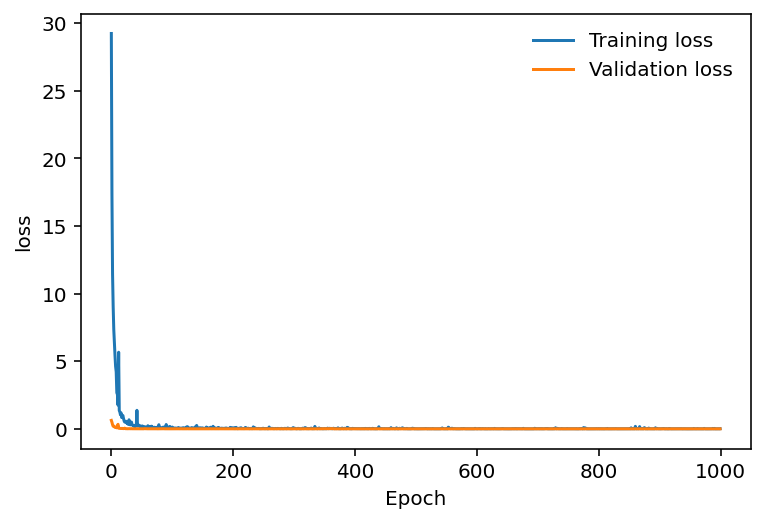

In [58]:
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(frameon=False)


In [59]:
train_losses

[29.24735644885472,
 17.34218762261527,
 11.45678575720106,
 9.066487748282297,
 7.3531048715114595,
 6.328897631594113,
 5.431709883894239,
 4.615097383090428,
 4.213425547523158,
 2.671955694258213,
 2.5421913115041597,
 1.7533951367650713,
 5.6682944276503155,
 1.361400376792465,
 1.2387468520951057,
 1.0364428443568094,
 1.178115700930357,
 0.8356188773576703,
 0.9648708164958018,
 0.9851626308900969,
 0.7580956814744111,
 0.5843341542141778,
 0.49363088734847094,
 0.5131083997232574,
 0.5610474038869142,
 0.4854242091732366,
 0.38535867141825814,
 0.4177386960812977,
 0.3279035094593252,
 0.6694349254747587,
 0.5360216196892517,
 0.2920567590477211,
 0.3943232013444815,
 0.502161859188761,
 0.32771140177335056,
 0.25200567775006805,
 0.24883714722735542,
 0.1863193570503167,
 0.19100139192305504,
 0.15936552797710257,
 0.2811804050313575,
 0.2342354122017111,
 1.370001467955964,
 0.20257959631936892,
 0.3105727309228054,
 0.245510681459148,
 0.23390741211894367,
 0.148090036343117

In [60]:
train_accuracy = 1 - np.array(train_losses)
validation_accuracy = 1 - np.array(val_losses)


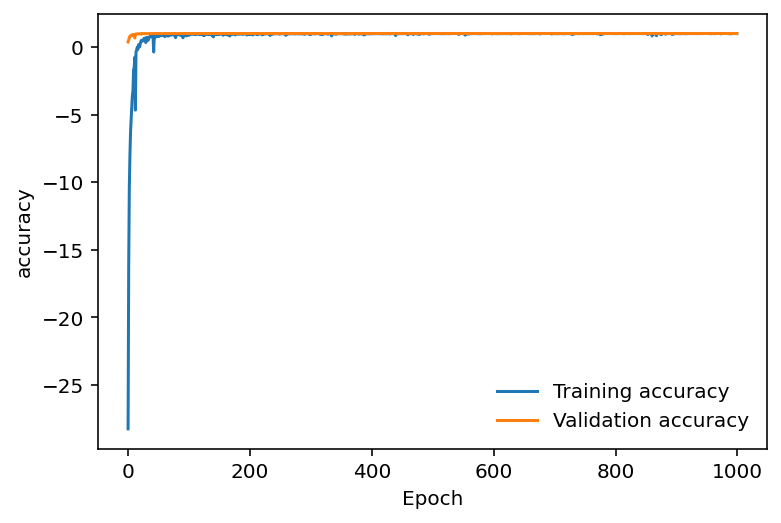

In [61]:
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(validation_accuracy, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(frameon=False)

In [62]:
test_loss = 0
test_labels = []
predicted_test_labels  = []
for data, target in test_dataloader:
        output = model(data)
        loss = criterion(output, target)
        test_labels.extend(target)
        predicted_test_labels.extend(torch.argmax(output, dim=1))
        test_loss += loss.item()* data.size(0)
test_loss = test_loss/len(test_dataloader.dataset)
print(test_loss)

8.723958198497502e-05


In [63]:
predicted_test_labels

[tensor(2),
 tensor(1),
 tensor(3),
 tensor(2),
 tensor(0),
 tensor(2),
 tensor(2),
 tensor(0),
 tensor(3),
 tensor(3),
 tensor(1),
 tensor(0),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(2),
 tensor(1),
 tensor(2),
 tensor(3),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(3),
 tensor(0),
 tensor(1),
 tensor(3),
 tensor(0),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(2),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(3),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(0),
 tensor(0),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(1),
 tensor(1),
 ten

In [64]:
test_labels

[tensor(2),
 tensor(1),
 tensor(3),
 tensor(2),
 tensor(0),
 tensor(2),
 tensor(2),
 tensor(0),
 tensor(3),
 tensor(3),
 tensor(1),
 tensor(0),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(0),
 tensor(2),
 tensor(1),
 tensor(2),
 tensor(3),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(3),
 tensor(0),
 tensor(1),
 tensor(3),
 tensor(0),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(0),
 tensor(1),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(2),
 tensor(3),
 tensor(1),
 tensor(3),
 tensor(3),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(1),
 tensor(2),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(0),
 tensor(0),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(0),
 tensor(0),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(2),
 tensor(2),
 tensor(2),
 tensor(3),
 tensor(1),
 tensor(1),
 ten

AxesSubplot(0.241667,0.125;0.503333x0.755)


Accuracy: 1.00000
Error rate:0.00000


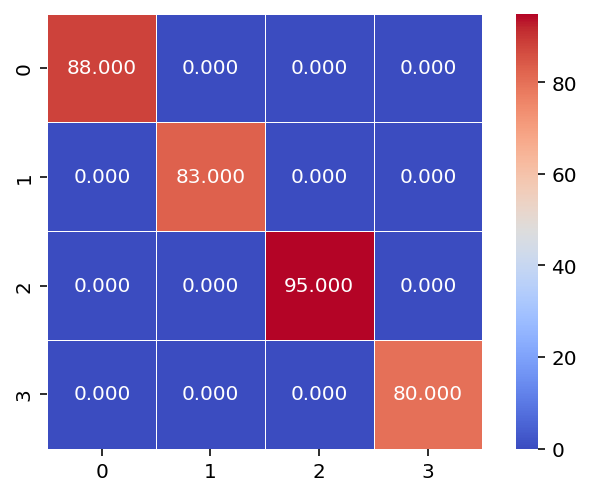

In [65]:
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_test_labels)
#print(confusion_matrix)
print(sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = plt.cm.coolwarm));
print('\n')
print(f"Accuracy: { accuracy_score(test_labels, predicted_test_labels):.5f}")
print(f"Error rate:{ 1 - accuracy_score(test_labels, predicted_test_labels):.5f}")

In [66]:
# OVERALL VAL LOSS
val_loss = 0
val_labels, predicted_val_labels =[],[]
for data, target in val_dataloader:
        output = model(data)
        loss = criterion(output, target)
        val_labels.extend(target)
        predicted_val_labels.extend(torch.argmax(output, dim=1))
        val_loss += loss.item()* data.size(0)
val_loss = val_loss/len(val_dataloader.dataset)
print(val_loss)

0.00017643181064037368


AxesSubplot(0.241667,0.125;0.503333x0.755)


Accuracy: 1.00000
Error rate:0.00000


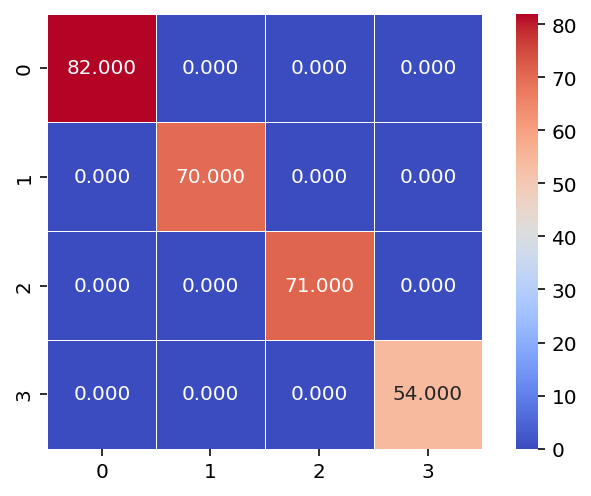

In [67]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc
confusion_matrix = metrics.confusion_matrix(val_labels, predicted_val_labels)
#print(confusion_matrix)
print(sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = plt.cm.coolwarm));

print('\n')
print(f"Accuracy: { accuracy_score(val_labels, predicted_val_labels):.5f}")
print(f"Error rate:{ 1 - accuracy_score(val_labels, predicted_val_labels):.5f}")

In [68]:
train_loss = 0
train_labels, predicted_train_labels =[],[]
for data, target in train_dataloader:
        output = model(data)
        loss = criterion(output, target)
        train_labels.extend(target)
        predicted_train_labels.extend(torch.argmax(output, dim=1))
        train_loss += loss.item()* data.size(0)
train_loss = train_loss/len(train_dataloader.dataset)
print(train_loss)

7.766728539046689e-05


[[262   0   0   0]
 [  0 279   0   0]
 [  0   0 266   0]
 [  0   0   0 298]]
AxesSubplot(0.241667,0.125;0.503333x0.755)


Accuracy: 1.00000
Error rate:0.00000


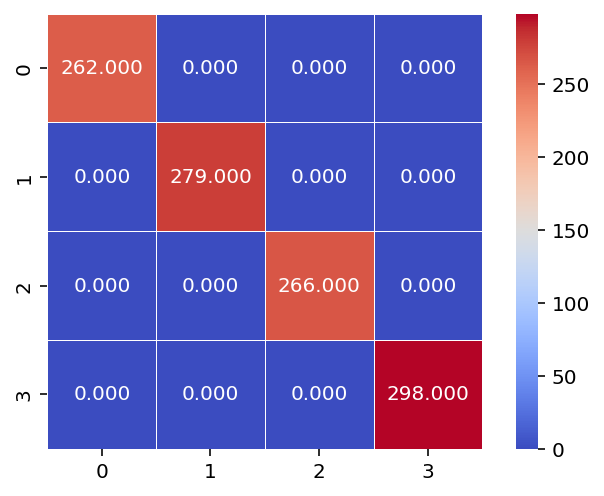

In [69]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc
confusion_matrix = metrics.confusion_matrix(train_labels, predicted_train_labels)
print(confusion_matrix)

print(sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = plt.cm.coolwarm));
print('\n')
print(f"Accuracy: { accuracy_score(train_labels, predicted_train_labels):.5f}")
print(f"Error rate:{ 1 - accuracy_score(train_labels, predicted_train_labels):.5f}")

In [70]:
target_test = []
output_test = []
for data,target in test_dataloader:
    output = model(data)
    target_test.append(target)
    output_test.append(output)
print(len(target_test))
print(len(output_test))

11
11


In [71]:
test['classification'].values

array([2, 2, 2, 2, 3, 2, 0, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3, 0,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 3, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 1, 0, 3, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 3, 0, 2,
       1, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,

In [72]:
print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
predictions = predicted_test_labels

print(classification_report(test_labels, predictions, target_names=tick_label))


			Classification Report

               precision    recall  f1-score   support

 class-0: acc       1.00      1.00      1.00        88
 class-1:good       1.00      1.00      1.00        83
class-2:unacc       1.00      1.00      1.00        95
class-3:vgood       1.00      1.00      1.00        80

     accuracy                           1.00       346
    macro avg       1.00      1.00      1.00       346
 weighted avg       1.00      1.00      1.00       346



In [73]:
print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
predictions = predicted_val_labels

print(classification_report(val_labels, predictions, target_names=tick_label))


			Classification Report

               precision    recall  f1-score   support

 class-0: acc       1.00      1.00      1.00        82
 class-1:good       1.00      1.00      1.00        70
class-2:unacc       1.00      1.00      1.00        71
class-3:vgood       1.00      1.00      1.00        54

     accuracy                           1.00       277
    macro avg       1.00      1.00      1.00       277
 weighted avg       1.00      1.00      1.00       277



In [74]:
print('\n\t\t\tClassification Report\n')
tick_label =['class-0: acc','class-1:good','class-2:unacc','class-3:vgood']
predictions = predicted_train_labels

print(classification_report(train_labels, predictions, target_names=tick_label))


			Classification Report

               precision    recall  f1-score   support

 class-0: acc       1.00      1.00      1.00       262
 class-1:good       1.00      1.00      1.00       279
class-2:unacc       1.00      1.00      1.00       266
class-3:vgood       1.00      1.00      1.00       298

     accuracy                           1.00      1105
    macro avg       1.00      1.00      1.00      1105
 weighted avg       1.00      1.00      1.00      1105

